In [1]:
import pandas as pd

/home/ubuntu/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ubuntu/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [11]:
sequence = 'AATGCCTGTGAGACTAATAGCAACTC'
print(len(sequence))

26


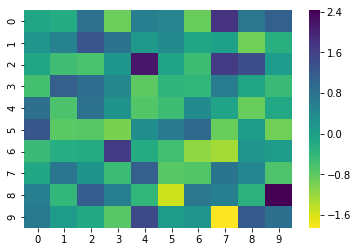

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots()

data = np.random.randn(100).reshape(10, 10)
sns.heatmap(data, cmap='viridis_r')
fig.savefig('../figures/viridis_heatmap.pdf')

In [3]:
ksize = 6

In [5]:
kmers = [sequence[i:(i+ksize)] for i in range(len(sequence) - ksize + 1)]
print(len(kmers))
kmers

21


['AATGCC',
 'ATGCCT',
 'TGCCTG',
 'GCCTGT',
 'CCTGTG',
 'CTGTGA',
 'TGTGAG',
 'GTGAGA',
 'TGAGAC',
 'GAGACT',
 'AGACTA',
 'GACTAA',
 'ACTAAT',
 'CTAATA',
 'TAATAG',
 'AATAGC',
 'ATAGCA',
 'TAGCAA',
 'AGCAAC',
 'GCAACT',
 'CAACTC']

In [6]:
len(set(kmers))

21

In [8]:
hashes = [hash(kmer) for kmer in kmers]
hashes

[2975355093487706742,
 -4118105600113849338,
 -5256987658684438142,
 9031597745747680024,
 8135101000182636355,
 2897173032656888631,
 -8344453955671504395,
 -6564277414051485267,
 -7012432350897759085,
 6994702741625991292,
 6140609993507045067,
 4712667550011694469,
 2811250341501004886,
 -26201231185939449,
 4387170094193117528,
 -4317165546468973981,
 -6054772612504490009,
 -5135887063470547649,
 6492331651019835212,
 102944457650492320,
 6432010842412835191]

In [9]:
kmer_hashes = pd.Series(hashes, index=kmers)
kmer_hashes

AATGCC    2975355093487706742
ATGCCT   -4118105600113849338
TGCCTG   -5256987658684438142
GCCTGT    9031597745747680024
CCTGTG    8135101000182636355
CTGTGA    2897173032656888631
TGTGAG   -8344453955671504395
GTGAGA   -6564277414051485267
TGAGAC   -7012432350897759085
GAGACT    6994702741625991292
AGACTA    6140609993507045067
GACTAA    4712667550011694469
ACTAAT    2811250341501004886
CTAATA     -26201231185939449
TAATAG    4387170094193117528
AATAGC   -4317165546468973981
ATAGCA   -6054772612504490009
TAGCAA   -5135887063470547649
AGCAAC    6492331651019835212
GCAACT     102944457650492320
CAACTC    6432010842412835191
dtype: int64

In [31]:
kmer_hashes = kmer_hashes.sort_values(ascending=False)
kmer_hashes.tail(10)

GCAACT     102944457650492320
CTAATA     -26201231185939449
ATGCCT   -4118105600113849338
AATAGC   -4317165546468973981
TAGCAA   -5135887063470547649
TGCCTG   -5256987658684438142
ATAGCA   -6054772612504490009
GTGAGA   -6564277414051485267
TGAGAC   -7012432350897759085
TGTGAG   -8344453955671504395
dtype: int64

In [33]:
for kmer in kmer_hashes.index:
    print(kmer)

GCCTGT
CCTGTG
GAGACT
AGCAAC
CAACTC
AGACTA
GACTAA
TAATAG
AATGCC
CTGTGA
ACTAAT
GCAACT
CTAATA
ATGCCT
AATAGC
TAGCAA
TGCCTG
ATAGCA
GTGAGA
TGAGAC
TGTGAG


In [34]:
for kmer_hash in kmer_hashes:
    print(kmer_hash)

9031597745747680024
8135101000182636355
6994702741625991292
6492331651019835212
6432010842412835191
6140609993507045067
4712667550011694469
4387170094193117528
2975355093487706742
2897173032656888631
2811250341501004886
102944457650492320
-26201231185939449
-4118105600113849338
-4317165546468973981
-5135887063470547649
-5256987658684438142
-6054772612504490009
-6564277414051485267
-7012432350897759085
-8344453955671504395


In [35]:
bottom_hash = kmer_hashes.tail(10)
bottom_hash

GCAACT     102944457650492320
CTAATA     -26201231185939449
ATGCCT   -4118105600113849338
AATAGC   -4317165546468973981
TAGCAA   -5135887063470547649
TGCCTG   -5256987658684438142
ATAGCA   -6054772612504490009
GTGAGA   -6564277414051485267
TGAGAC   -7012432350897759085
TGTGAG   -8344453955671504395
dtype: int64

In [36]:
bottom_hash_positions = pd.Series([sequence.find(kmer) for kmer in bottom_hash.index], index=bottom_hash.index)
bottom_hash_positions = bottom_hash_positions.sort_values()
bottom_hash_positions

ATGCCT     1
TGCCTG     2
TGTGAG     6
GTGAGA     7
TGAGAC     8
CTAATA    13
AATAGC    15
ATAGCA    16
TAGCAA    17
GCAACT    19
dtype: int64

In [27]:
bottom_hash_positions.drop(['GTGAGA', 'ATGCCT', 'TGAGAC', 'AATAGC', 'TGCCTG', 'TAGCAA', 'GCAACT'])

TGTGAG     6
CTAATA    13
ATAGCA    16
dtype: int64

In [39]:
', '.join(bottom_hash.index)

'GCAACT, CTAATA, ATGCCT, AATAGC, TAGCAA, TGCCTG, ATAGCA, GTGAGA, TGAGAC, TGTGAG'

In [40]:
bottom_hash.index

Index(['GCAACT', 'CTAATA', 'ATGCCT', 'AATAGC', 'TAGCAA', 'TGCCTG', 'ATAGCA',
       'GTGAGA', 'TGAGAC', 'TGTGAG'],
      dtype='object')

In [ ]:
<!-- Generator: Adobe Illustrator 22.1.0, SVG Export Plug-In  -->
<svg version="1.1"
	 xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:a="http://ns.adobe.com/AdobeSVGViewerExtensions/3.0/"
	 x="0px" y="0px" width="270.6px" height="41px" viewBox="0 0 270.6 41" style="enable-background:new 0 0 270.6 41;"
	 xml:space="preserve">
<style type="text/css">
	.st0{fill:none;stroke:#000000;stroke-width:3;stroke-miterlimit:10;}
</style>
<defs>
</defs>
<line class="st0" x1="0.2" y1="1.5" x2="270.4" y2="39.5"/>
</svg>
 

In [41]:

from Bio.Seq import Seq

ModuleNotFoundError: No module named 'Bio'